# ADP 비정형 데이터

In [1]:
from konlpy.tag import Mecab
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
import nltk

In [2]:
mecab = Mecab()

In [3]:
mecab.tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NNB': '의존 명사',
 'NNBC': '단위를 나타내는 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'SC': '구분자 , · / :',
 'SE': '줄임표 …',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SSC': '닫는 괄호 ), ]',
 'SSO': '여는 괄호 (, [',
 'SY': '기타 기호',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [4]:
sentence = '잘생긴 아버지가 방에 스르륵 들어가신다.'

#### 명사 추출

In [5]:
mecab.nouns(sentence)

['아버지', '방']

#### 품사 확인

In [6]:
mecab.pos(sentence)

[('잘생긴', 'VA+ETM'),
 ('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKB'),
 ('스르륵', 'MAG'),
 ('들어가', 'VV'),
 ('신다', 'EP+EF'),
 ('.', 'SF')]

### 품사별로 리스트에 취합

In [7]:
명사 = []
조사 = []
형용사 = []
동사 = []
수식언 = []
어미 = []

In [8]:
품사토큰 = mecab.pos(sentence)
for t in 품사토큰 :
    if t[1].startswith('N') :
        명사.append(t[0])
    elif t[1].startswith('J') :
        조사.append(t[0])
    elif t[1].startswith('VA') :
        형용사.append(t[0])
    elif t[1] == 'VV' :
        동사.append(t[0])
    elif t[1].startswith('M') :
        수식언.append(t[0])
    elif t[1].startswith('E') :
        어미.append(t[0])

In [9]:
print(f'명사 리스트는 {명사}')
print(f'조사 리스트는 {조사}')
print(f'형용사 리스트는 {형용사}')
print(f'동사 리스트는 {동사}')
print(f'수식언 리스트는 {수식언}')
print(f'어미 리스트는 {어미}')

명사 리스트는 ['아버지', '방']
조사 리스트는 ['가', '에']
형용사 리스트는 ['잘생긴']
동사 리스트는 ['들어가']
수식언 리스트는 ['스르륵']
어미 리스트는 ['신다']


## 데이터를 Corpus로 만들고 전처리

In [10]:
import pandas as pd

In [11]:
news = pd.read_table('/Users/kisehyun/study_code/ADP/PART 06 실습용 데이터/키워드_뉴스.txt', sep = '\t', encoding = 'cp949', names = ['텍스트'])

In [12]:
news.head()

,텍스트
0,동아대학교(총장 한석정)가 '수요자 데이터기반 스마트헬스케어 서비스'분야 ‘4차 산...
1,첨단 정보통신기술에 AI 등이 더해지면서 무기체계가 날로 지능화하는 가운데 '국방개...
2,SK하이닉스는 김영한(사진) 미국 샌디에이고 캘리포니아대(UCSD) 종신 교수를 수...
3,삼성SDS(대표 홍원표)는 국내·외 대학(원)생을 대상으로 데이터 분석 경진대회인 ...
4,푸드테크 스타트업들이 빅데이터 기반 시스템 배달 체계로 전환한다. 일선 상점과 배달...


#### 형용사 추출

In [13]:
adj = []

In [14]:
for r in news.values :
    token = mecab.pos(r[0])
    for text in token :
        if text[1].startswith('VA') :
            adj.append(text[0])
        else :
            pass

In [15]:
adj

['높',
 '빨라',
 '새로운',
 '빠르',
 '빨라',
 '걸맞',
 '뛰어난',
 '좋',
 '있',
 '같',
 '높',
 '가깝',
 '빠르',
 '좋',
 '좋',
 '쉽',
 '높',
 '가까운',
 '머지않',
 '같',
 '수많']

## TDM 구축

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
news.values[0]

array(["동아대학교(총장 한석정)가 '수요자 데이터기반 스마트헬스케어 서비스'분야 ‘4차 산업혁명 혁신선도대학으로 최종선정됐습니다. 동아대가 혁신선도대학으로 펼치게 될 ‘수요자 데이터기반 스마트헬스케어 서비스’ 산업은 리빙데이터(운동·영양·약물)와 메디컬데이터(생체계측·진료기록)를 종합 분석, 다양한 헬스케어 서비스를 제공하는 것입니다. 동아대는 건강과학대학과 의료원, 재활요양병원 등 경쟁력 있는 인프라를 바탕으로 신뢰도 높은 정밀 분석을 실시, ‘헬스케어 기획 전문가’와 ‘헬스케어 데이터분석 전문가’ 등 수요자 맞춤형 헬스케어 서비스 분야를 선도하는 전문 인재를 키워나갈 계획입니다. ‘스마트헬스케어 융합전공’을 신설, 경영정보학과를 중심으로 한 빅데이터 분석, 식품영양학과·의약생명공학과·건강관리학과 중심의 헬스케어 등 학문 간 경계는 교육혁신도 이뤄나갈 방침입니다. "],
      dtype=object)

- array형태로 나와서 각 기사별로 인덱싱 0해서 리스트형태로 추출해야함.

In [18]:
text = [x[0] for x in news.values] # 0으로 인덱싱

In [19]:
text[0]

"동아대학교(총장 한석정)가 '수요자 데이터기반 스마트헬스케어 서비스'분야 ‘4차 산업혁명 혁신선도대학으로 최종선정됐습니다. 동아대가 혁신선도대학으로 펼치게 될 ‘수요자 데이터기반 스마트헬스케어 서비스’ 산업은 리빙데이터(운동·영양·약물)와 메디컬데이터(생체계측·진료기록)를 종합 분석, 다양한 헬스케어 서비스를 제공하는 것입니다. 동아대는 건강과학대학과 의료원, 재활요양병원 등 경쟁력 있는 인프라를 바탕으로 신뢰도 높은 정밀 분석을 실시, ‘헬스케어 기획 전문가’와 ‘헬스케어 데이터분석 전문가’ 등 수요자 맞춤형 헬스케어 서비스 분야를 선도하는 전문 인재를 키워나갈 계획입니다. ‘스마트헬스케어 융합전공’을 신설, 경영정보학과를 중심으로 한 빅데이터 분석, 식품영양학과·의약생명공학과·건강관리학과 중심의 헬스케어 등 학문 간 경계는 교육혁신도 이뤄나갈 방침입니다. "

### 전처리 없이 띄어쓰기 기준으로 TDM 구축

In [20]:
c = CountVectorizer()

In [21]:
tdm = c.fit_transform([x[0] for x in news.values])

In [22]:
tdm

<10x1388 sparse matrix of type '<class 'numpy.int64'>'
	with 1635 stored elements in Compressed Sparse Row format>

In [23]:
c.get_feature_names()[:20]

['000만원',
 '000만원으로',
 '000명',
 '10시간',
 '10월',
 '10일',
 '10일부터',
 '11월',
 '13일',
 '150여명에',
 '15여년간',
 '15일',
 '15일까지',
 '17일',
 '1월부터',
 '1일부터',
 '1차',
 '1팀',
 '200만원',
 '2014년']

In [24]:
pd.DataFrame(tdm.todense().T, index = c.get_feature_names())

,0,1,2,3,4,5,6,7,8,9
000만원,0,0,0,0,0,0,1,0,0,0
000만원으로,0,0,0,0,0,0,1,0,0,0
000명,0,0,0,1,0,0,0,0,0,0
10시간,0,0,0,0,1,0,0,0,0,0
10월,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
효율을,0,0,0,0,1,0,0,0,0,0
효율적인,0,0,0,0,1,0,0,0,0,0
효율화,0,0,0,0,1,0,0,0,0,0
훈련체계를,0,1,0,0,0,0,0,0,0,0


#### 0 ~ 9번(10개 기사) 본문에서 등장한 각 단어들을 원-핫 인코딩으로 표현한 데이터 프레임

In [25]:
news.텍스트.str.contains('힘써달라')

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9    False
Name: 텍스트, dtype: bool

#### 실제로 9번째 글에 '힘써달라'라는 단어가 있는 것을 알 수 있다.

### 명사만 추출하여 TDM 구축

In [26]:
nouns_token = []

In [27]:
for r in news.values :
    nouns = mecab.nouns(r[0])
    nouns_token.append(nouns)

In [28]:
token_df = pd.DataFrame([t + ' ' for x in nouns_token for t in x])

In [29]:
from collections import Counter

In [30]:
l = []
for i in range(10) :
    l += nouns_token[i]

In [31]:
word_df = pd.DataFrame(l, columns = ['단어'])
word_df.head()

,단어
0,동아
1,대학교
2,총장
3,한석정
4,수요자


In [32]:
for doc_num in range(10) :
    cnt = Counter(nouns_token[doc_num])
    key = list(cnt.keys())
    value = list(cnt.values())
    doc_df = pd.DataFrame({'단어' : key, f'기사{doc_num + 1}' : value})
    word_df = pd.merge(word_df, doc_df, how = 'left', on = '단어')
word_df.fillna(0, inplace = True)

In [33]:
word_df # 명사 TDM 구축

,단어,기사1,기사2,기사3,기사4,기사5,기사6,기사7,기사8,기사9,기사10
0,동아,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,대학교,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,총장,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,한석정,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,수요자,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2016,모델,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
2017,등,3.0,2.0,1.0,2.0,1.0,3.0,3.0,1.0,1.0,3.0
2018,개발,0.0,0.0,3.0,0.0,4.0,0.0,1.0,0.0,1.0,3.0
2019,서비스,4.0,3.0,0.0,0.0,7.0,4.0,1.0,0.0,0.0,3.0


### 상위 20 단어 시각화

In [34]:
top20 = pd.Series(l).value_counts().sort_values(ascending = False)[:20].reset_index(name = '언급량')

/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


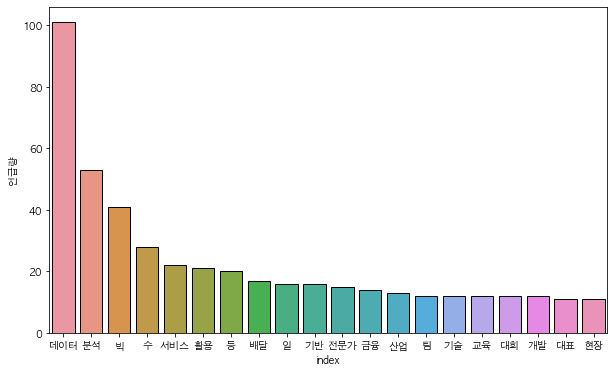

In [35]:
plt.figure(figsize = (10,6))
sns.barplot(top20['index'], top20.언급량, edgecolor = (0, 0, 0))
plt.show()

## 워드클라우드

In [36]:
from wordcloud import WordCloud

In [37]:
wc = WordCloud(font_path = 'AppleGothic', background_color = 'white').generate_from_frequencies(dict(Counter(l).most_common(100)))

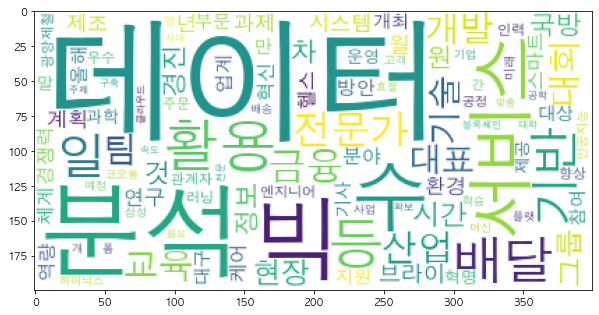

In [38]:
plt.figure(figsize = (10, 6))
plt.imshow(wc)
plt.show()

## 영문

In [39]:
from nltk.corpus import stopwords 

In [40]:
st = stopwords.words('english')
st

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

nltk 안쓰고 토큰화 하는 방법은 띄어쓰기 기준이 적합함.

In [52]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [53]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [54]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [41]:
from sklearn.datasets import fetch_20newsgroups

In [42]:
df = pd.read_csv("/Users/kisehyun/Vacation/2019winter/비정형/hotel-reviews.csv")

In [43]:
df.Description = df.Description.str.replace('\n', '')
df.Description = df.Description.str.replace('\r', '')

In [44]:
df.Description = df.Description.str.replace("’re", ' are')
df.Description = df.Description.str.replace("n’t", ' not')
df.Description = df.Description.str.replace("t’s", 't is')
df.Description = df.Description.str.replace("’ve", ' have')
df.Description = df.Description.str.replace("I’d", 'I would')

In [45]:
df['token'] = df.Description.str.split(' ')

In [46]:
df.token

0        [The, room, was, kind, of, clean, but, had, a,...
1        [I, stayed, at, the, Crown, Plaza, April, --, ...
2        [I, booked, this, hotel, through, Hotwire, at,...
3        [Stayed, here, with, husband, and, sons, on, t...
4        [My, girlfriends, and, I, stayed, here, to, ce...
                               ...                        
38927    [We, arrived, late, at, night, and, walked, in...
38928    [The, only, positive, impression, is, location...
38929    [Traveling, with, friends, for, shopping, and,...
38930    [The, experience, was, just, ok., We, paid, ex...
38931    [The, Westin, is, a, wonderfully, restored, gr...
Name: token, Length: 38932, dtype: object

### Keras 이용

In [55]:
#from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.layers import *
#from tensorflow.keras.models import *
#from tensorflow.keras.regularizers import *
#from tensorflow.keras.optimizers import *
#from tensorflow.keras.callbacks import *
#from sklearn.metrics import accuracy_score

In [48]:
#tokenizer = Tokenizer(num_words = n) # 가장 빈도 높은 n개 단어 추출 / 초기 단계에선느 n세팅 no

In [49]:
#tokenizer.fit_on_texts(text)

In [51]:
#one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# 계산된 단어 인덱스를 dictionary 형태로 확인
#word_index = tokenizer.word_index

#print('Found %s unique tokens.' % len(word_index))

In [ ]:
#threshold = 6
#total_cnt = len(tokenizer.word_index) # 단어의 수
#rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
#total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
#rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
#for key, value in tokenizer.word_counts.items():
#    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
#    if(value < threshold):
#        rare_cnt = rare_cnt + 1
#        rare_freq = rare_freq + value

#print('단어 집합(vocabulary)의 크기 :',total_cnt)
#print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
#print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
#print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

In [ ]:
#vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
#print('단어 집합의 크기 :',vocab_size)

In [ ]:
#tokenizer = Tokenizer(vocab_size)
#tokenizer.fit_on_texts(text)

In [ ]:
#seq = tokenizer.texts_to_sequences(text)

In [56]:
#seq = pad_sequences(sequences, maxlen = max_len)

In [ ]:
#model = Sequential()
#model.add(Embedding(vocab_size, 32, input_length = max_len))
#model.add(Dropout(.2))
#model.add(GRU(32, dropout = .2, recurrent_dropout = .1))
#model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#model = Sequential()
#model.add(Embedding(vocab_size, 32, input_length = max_len))
#model.add(Dropout(.3))
#model.add(Conv1D(32, 3, activation='relu', kernel_regularizer = l2(0.001)))
#model.add(GlobalMaxPooling1D())
#model.add(Dense(32, activation = 'relu'))
#model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#es = EarlyStopping(monitor = 'val_acc', mode = 'max', verbose = 1, patience = 3)
#mc = ModelCheckpoint('model1.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
#model.compile(optimizer= RMSprop(lr = .005), loss = 'binary_crossentropy', metrics = ['acc'])
#history = model.fit(tr_seq, labels, epochs = 50, batch_size = 64, shuffle = True, validation_split = .1, verbose = 1, callbacks = [es,mc])